In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed
from pacological.hh import exp, gain
from convenience.numpy import save_hdfz, load_hdfz

def plot_fi(rates, Is, gs, vs, xfactors):
    n_plot = 3

    plt.figure(figsize=(4,12))
    plt.subplot(n_plot, 1, 1)
    plt.plot(Is, rates[:,0], label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, rates[:,1], label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, rates[:,2], label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, rates[:,3], label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, rates[:,4], label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("Firing rate (Hz)")


    plt.subplot(n_plot, 1, 2)
    plt.plot(Is, gs[:,0], label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, gs[:,1], label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, gs[:,2], label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, gs[:,3], label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, gs[:,4], label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("g (nanosiemens)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.subplot(n_plot, 1, 3)
    plt.plot(Is, vs[:,0]*1000, label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, vs[:,1]*1000, label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, vs[:,2]*1000, label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, vs[:,3]*1000, label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, vs[:,4]*1000, label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("Vm (mvolt)")

-67.9560031686 19.9691417192


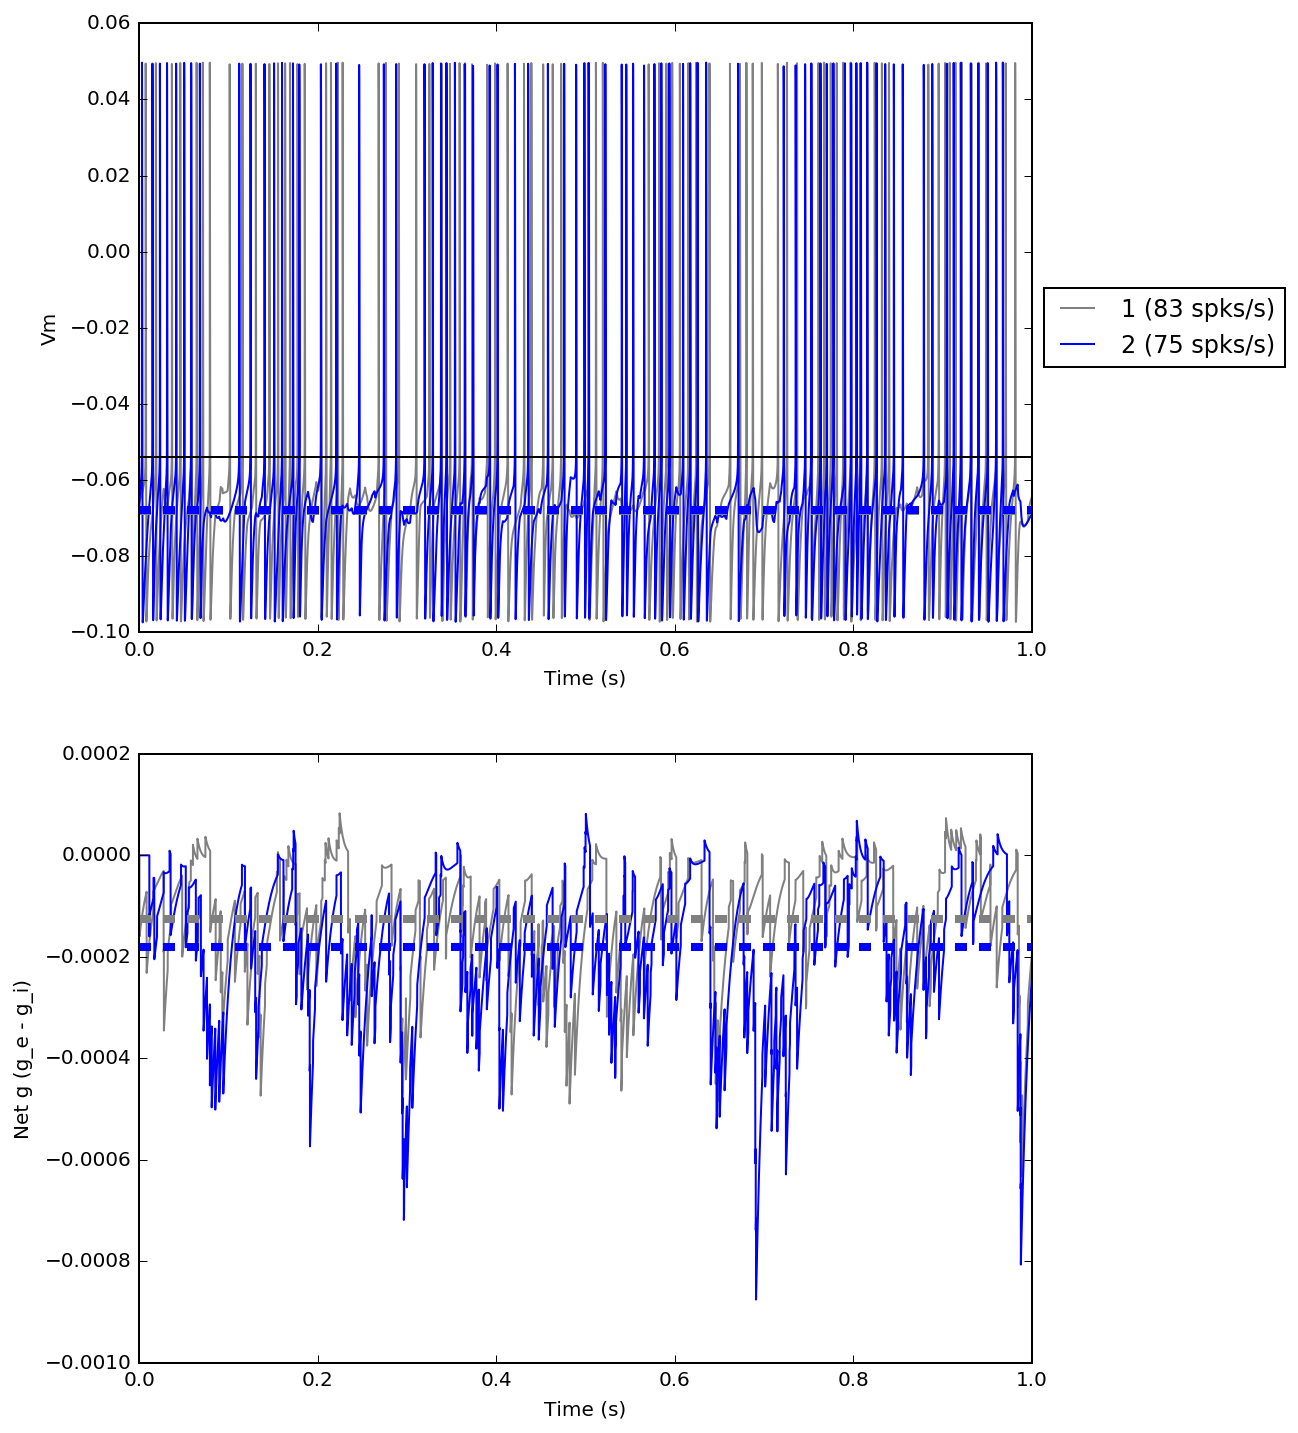

In [7]:
# --
f = 0

I = 3
w_e = 40.
w_i = 160.

xfactor1 = 1
xfactor2 = 1

# --
t = 1

res1 = exp(t, I, xfactor1, f=f)
res2 = exp(t, I, xfactor2, f=f)

# --
spikes1 = res1['spikes']
traces1 = res1['traces']
spikes2 = res2['spikes']
traces2 = res2['traces']

tot_g1 = traces1.g_e_[0] - traces1.g_i_[0]
M_v1 = np.mean(traces1.V_[0])
SD_v1 = np.std(traces1.V_[0])
rate1 = spikes1.t_[:].shape[0] / t

tot_g2 = traces2.g_e_[0] - traces2.g_i_[0]
rate2 = spikes2.t_[:].shape[0] / t

voltages = traces2.V_[0]
# mask = np.logical_and((voltages < -0.06), (voltages > -0.08))
M_v2 = np.mean(voltages)
SD_v2 = np.std(voltages)
print M_v2 * 1000, SD_v2 * 1000

# --
n_plot = 2
plt.figure(figsize=(8,12))
plt.subplot(n_plot, 1, 1)

plt.plot(traces1.t_, traces1.V_[0], 'grey', label='1 ({} spks/s)'.format(rate1))
plt.plot(traces2.t_, traces2.V_[0], 'blue', label='2 ({} spks/s)'.format(rate2))
plt.axhline(y=-0.054, color='k')
plt.axhline(y=np.mean(traces1.V_[0]), color='grey', linestyle='--', linewidth=4)
plt.axhline(y=np.mean(traces2.V_[0]), color='blue', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Vm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(n_plot, 1, 2)
plt.plot(traces1.t_, tot_g1, 'grey', label='1')
plt.plot(traces2.t_, tot_g2, 'blue', label='2')
plt.axhline(y=np.mean(tot_g1), color='grey', linestyle='--', linewidth=4)
plt.axhline(y=np.mean(tot_g2), color='blue', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Net g (g_e - g_i)')